In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime # datetime is a function of datetime module
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# How to use dates & times with pandas

In [2]:
datetime(2017,1,1) # datetime wi

datetime.datetime(2017, 1, 1, 0, 0)

## Basic Building Block: pd.Timestamp

In [3]:
pd.Timestamp(datetime(2017,1,1))

Timestamp('2017-01-01 00:00:00')

In [13]:
pd.Timestamp('2017-01-01')

Timestamp('2017-01-01 00:00:00')

In [14]:
time_stamp = pd.Timestamp(datetime(2017,1,1))

In [15]:
time_stamp.year

2017

In [16]:
type(time_stamp)

pandas._libs.tslibs.timestamps.Timestamp

In [17]:
#weekday_name is now deprecated
time_stamp.weekday_name

AttributeError: 'Timestamp' object has no attribute 'weekday_name'

In [19]:
time_stamp.day_name() #don't forget parenthesis after day_name()

'Sunday'

## More building blocks: pd.Period & freq

In [20]:
period = pd.Period('2017-01') #period object has freq attribute to store frequency info
period 

Period('2017-01', 'M')

In [21]:
period.asfreq('D') #changeing the freq attribute to days

Period('2017-01-31', 'D')

In [22]:
period.to_timestamp().to_period('M') #Convert pd.Period() to pd.Timestamp() and back

Period('2017-01', 'M')

In [23]:
period + 2 #frequency info enables basic date arithmatic

Period('2017-03', 'M')

In [27]:
pd.Timestamp('2017-01-31','M')+1 #old way of doing things

<ipython-input-27-92dd093111e8>:1: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2017-01-31','M')+1 #old way of doing things


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [29]:
pd.Timestamp('2017-01-31')+ dt.timedelta(days = 3) # updated way

Timestamp('2017-02-03 00:00:00')

## Sequence of Date and Time: pd.date_range(start,periods,freq)

In [30]:
index = pd.date_range(start = '2017-1-1',periods = 12, freq = 'D')
index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12'],
              dtype='datetime64[ns]', freq='D')

pd.DateTimeIndex : sequence of Timestamp objects with frequency info

## Create a time series: pd.DatetimeIndex

In [31]:
pd.DataFrame({"data":index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


In [32]:
data = np.random.random(12)
pd.DataFrame(data,index = index)
pd.DataFrame(data,index = index).info()

,0
2017-01-01,0.992346
2017-01-02,0.743901
2017-01-03,0.615954
2017-01-04,0.803001
2017-01-05,0.103288
2017-01-06,0.174726
2017-01-07,0.769625
2017-01-08,0.199289
2017-01-09,0.622151
2017-01-10,0.469561


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-01 to 2017-01-12
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
dtypes: float64(1)
memory usage: 192.0 bytes


In [33]:
index[0]

Timestamp('2017-01-01 00:00:00', freq='D')

In [34]:
index.to_period() # converting DatetimeIndex to a PeriodIndex

PeriodIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
             '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
             '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12'],
            dtype='period[D]')

## Frequency Aliases & time info

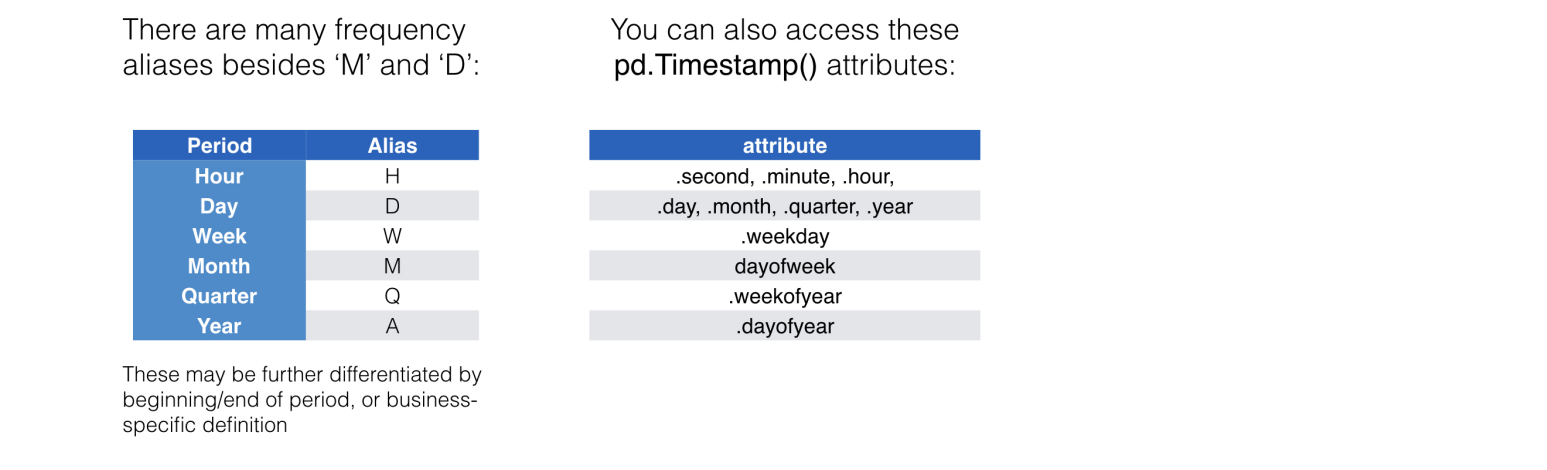

Use `pd.date_range` to create seven dates starting from `'2017-1-1'` at (default) daily frequency. Use the arguments `start` and `periods`. Assign the result to `seven_days`.

In [35]:
seven_days = pd.date_range(start = '2017-1-1',periods = 7) #freq = 'D' is default
seven_days

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07'],
              dtype='datetime64[ns]', freq='D')

Iterate over each date in `seven_days` and in each iteration, print the `.dayofweek` and `.weekday_name` attributes.

In [36]:
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


## Indexing & resampling time series

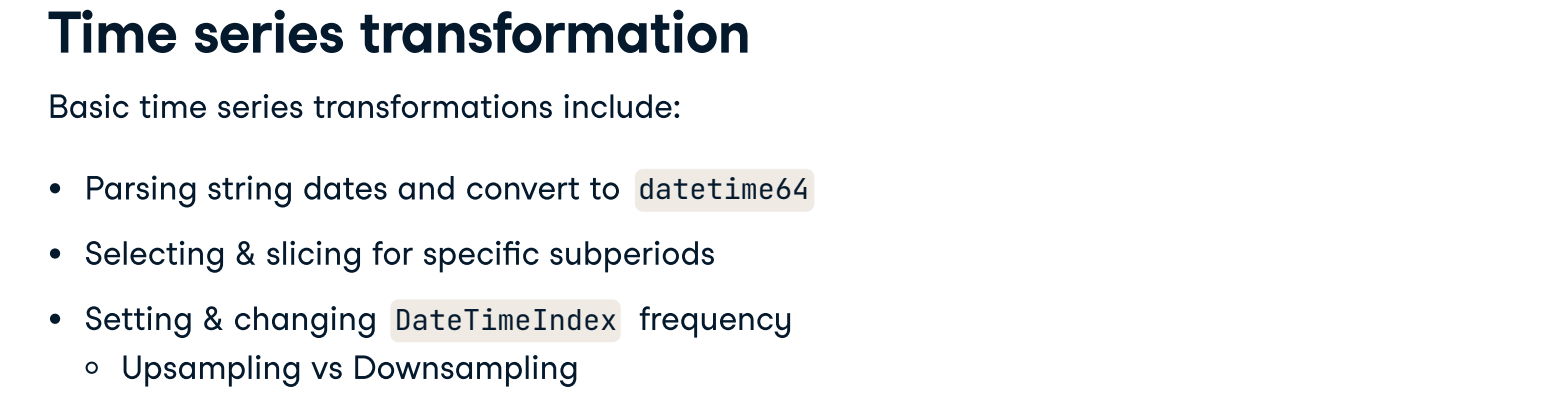

## Getting Google Stock prices

In [37]:
google = pd.read_csv('stock_data/google.csv')
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1094 non-null   object 
 1   Close   756 non-null    float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [38]:
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


## Converting string dates to datetime64

In [39]:
google.Date = pd.to_datetime(google.Date)

In [40]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1094 non-null   datetime64[ns]
 1   Close   756 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.2 KB


In [41]:
google.set_index('Date',inplace = True) # opposite of reset_index()
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


## Plotting the Google stock time series

<AxesSubplot:title={'center':'Google Stock Price'}, xlabel='Date'>

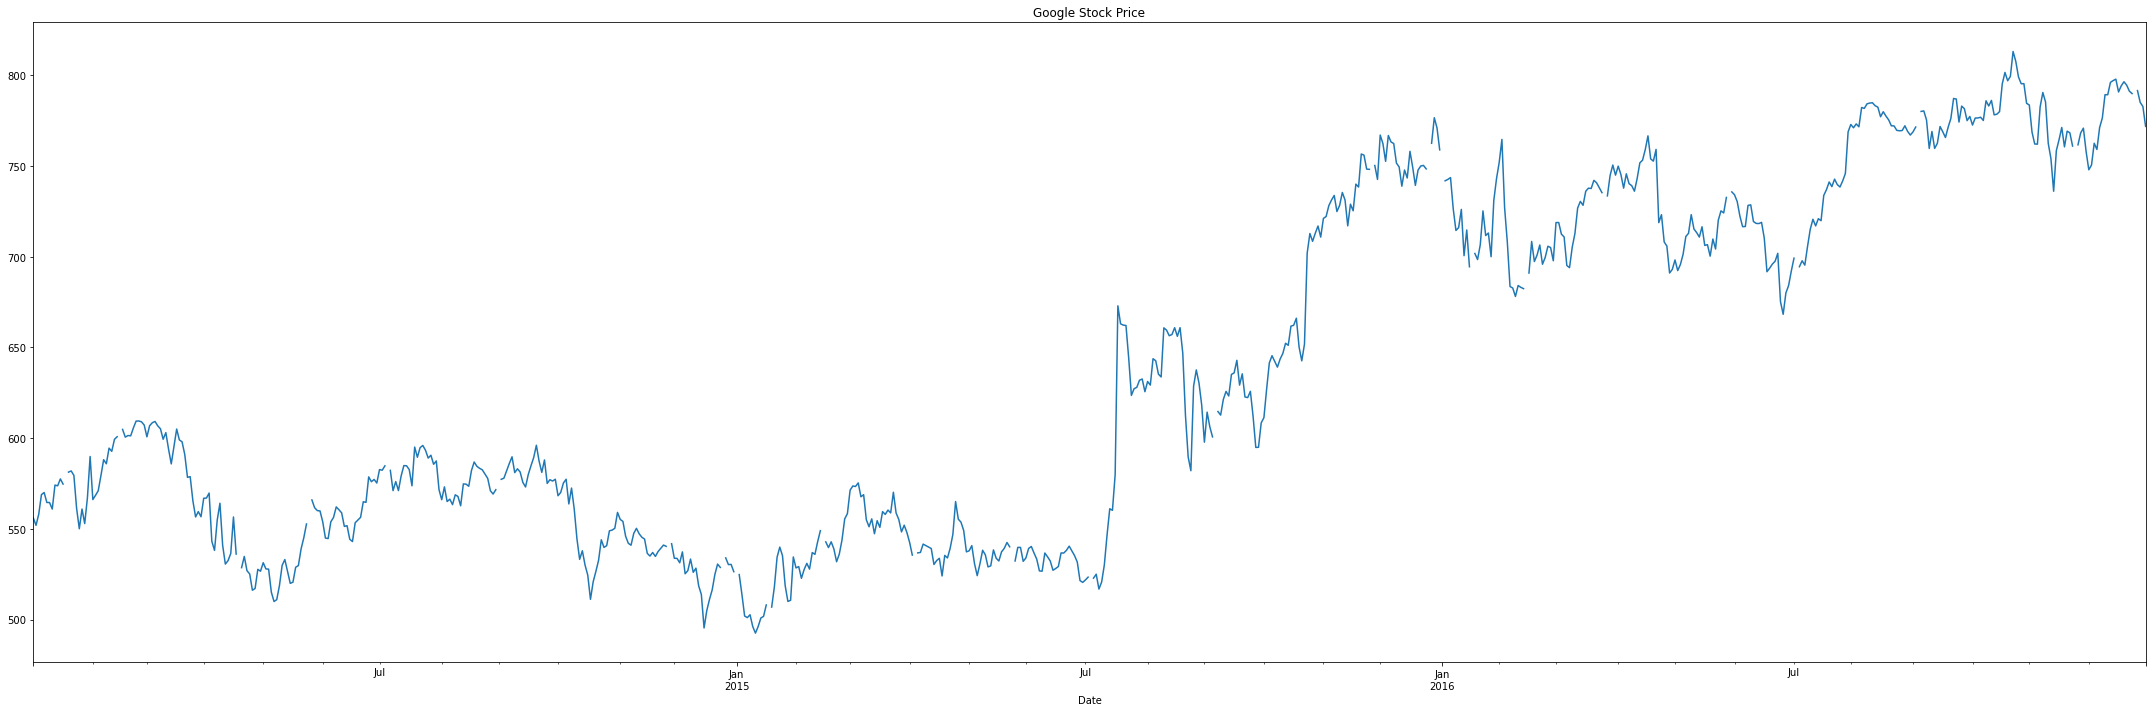

In [121]:
google.Close.plot(title = "Google Stock Price", linestyle = '-')
plt.tight_layout()
plt.rcParams['figure.figsize']=(30,10)
plt.show()

## Partial string indexing

In [43]:
#Selecting/indexing using strings that parse to dates
google['2015'].info() #Pass string for part of date

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


<ipython-input-43-a719c3812895>:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  google['2015'].info() #Pass string for part of date


accepting the future warning

In [44]:
google.loc['2015'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [45]:
google['2015-3':'2015-5'].info() #Slice 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2015-03-01 to 2015-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   63 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [46]:
google.loc['2015-3':'2015-5'].info() #accepting future warning

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2015-03-01 to 2015-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   63 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


In [47]:
google.loc['2015-06-01',"Close"] #Use full date with .loc[]

533.99

In [48]:
google.loc['2015-06',"Close"].head()

Date
2015-06-01    533.99
2015-06-02    539.18
2015-06-03    540.31
2015-06-04    536.70
2015-06-05    533.33
Name: Close, dtype: float64

## .asfreq(): set frequency

In [49]:
google.asfreq('D').info() # convert DatetimeIndex to calendar day frequency

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [50]:
#Unsampling
#Higher frequency implies new data => missing data
google.asfreq('D').head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


## .asfreq(): reset frequency

In [51]:
# .asfreq('B'): Convert DatetimeIndex to business day frequency
google = google.asfreq('B') 
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 782 entries, 2014-01-02 to 2016-12-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [52]:
google[google.Close.isnull()] #Select missing 'Close' values
# business days that were not trading days

,Close
Date,
2014-01-20,NaN
2014-02-17,NaN
2014-04-18,NaN
2014-05-26,NaN
2014-07-04,NaN
2014-09-01,NaN
2014-11-27,NaN
2014-12-25,NaN
2015-01-01,NaN


## <b>Question:</b> We have already imported pandas as pd and matplotlib.pyplot as plt for you, and loaded the air quality DataFrame into the variable data.

    Inspect data using .info().
    Use pd.to_datetime to convert the column 'date' to dtype datetime64.
    Set the 'date' column as index.
    Validate the changes by inspecting data using .info() again.
    Plot data using subplots=True.


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

Text(0.5, 1.0, 'Air Quality Data at NYC')

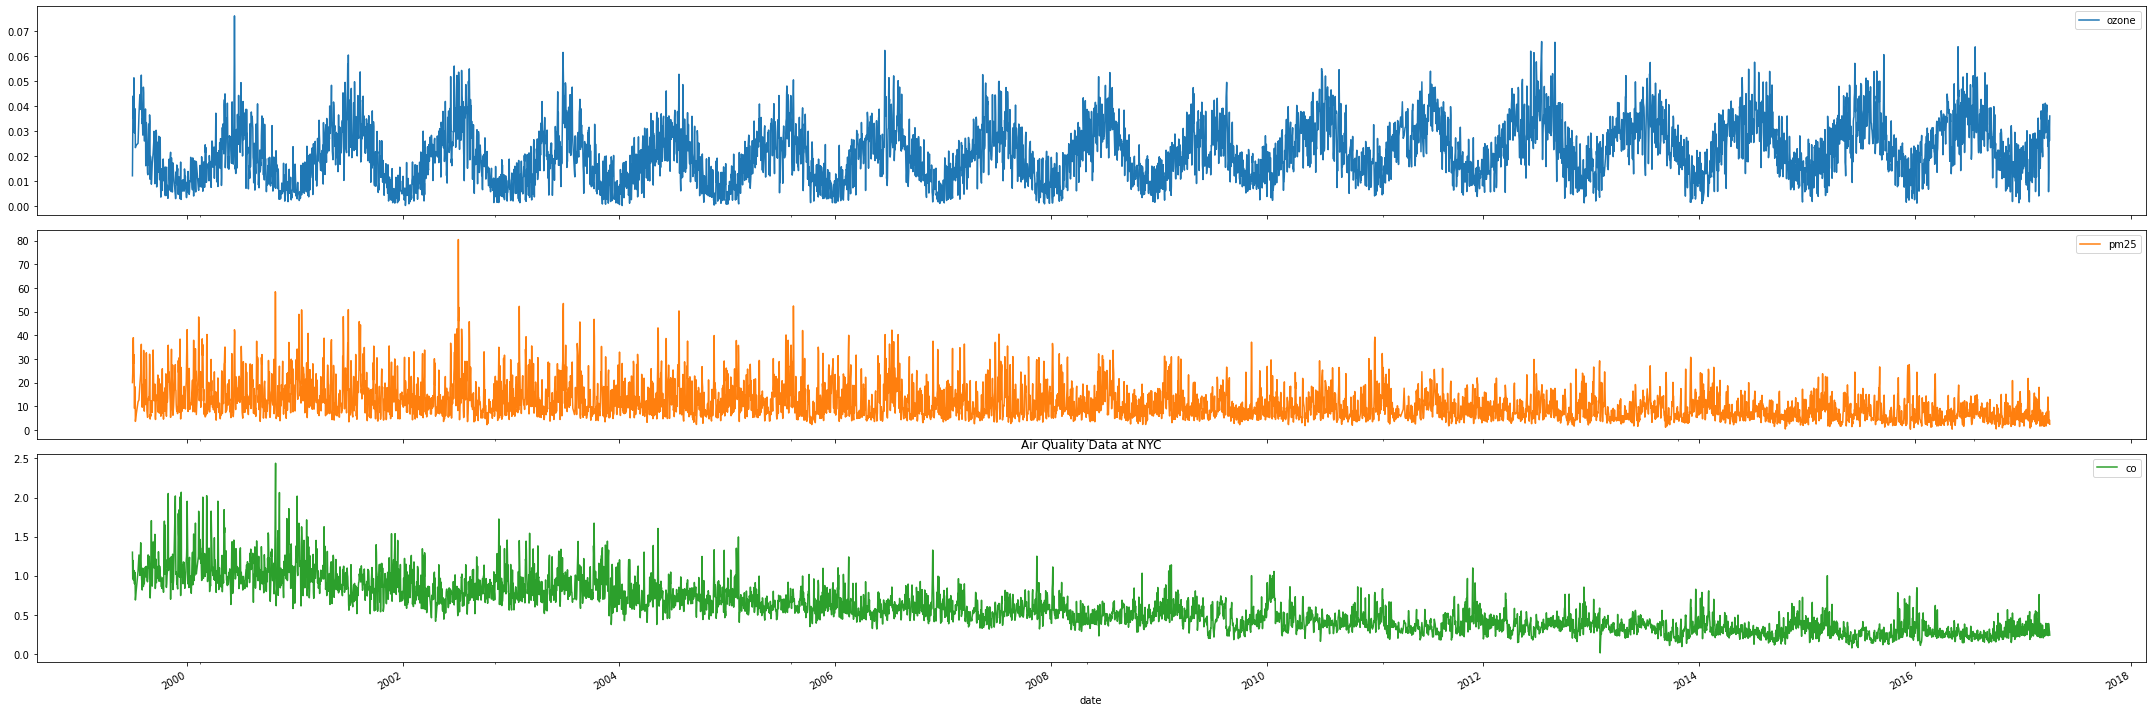

In [53]:
data = pd.read_csv('air_quality_data/nyc.csv')
data.date = pd.to_datetime(data.date)
data.set_index("date",inplace = True)
data.plot(subplots = True)
plt.tight_layout()
plt.title("Air Quality Data at NYC")

## <b> Question: </b> Load the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.

    Create an empty pd.DataFrame() called prices.
    Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
        Use the iteration variable to select the data for this year and the column price.
        Use .reset_index() with drop=True to remove the DatetimeIndex.
        Rename the column price column to the appropriate year.
        Use pd.concat() to combine the yearly data with the data in prices along axis=1.
    Plot prices.


<AxesSubplot:>

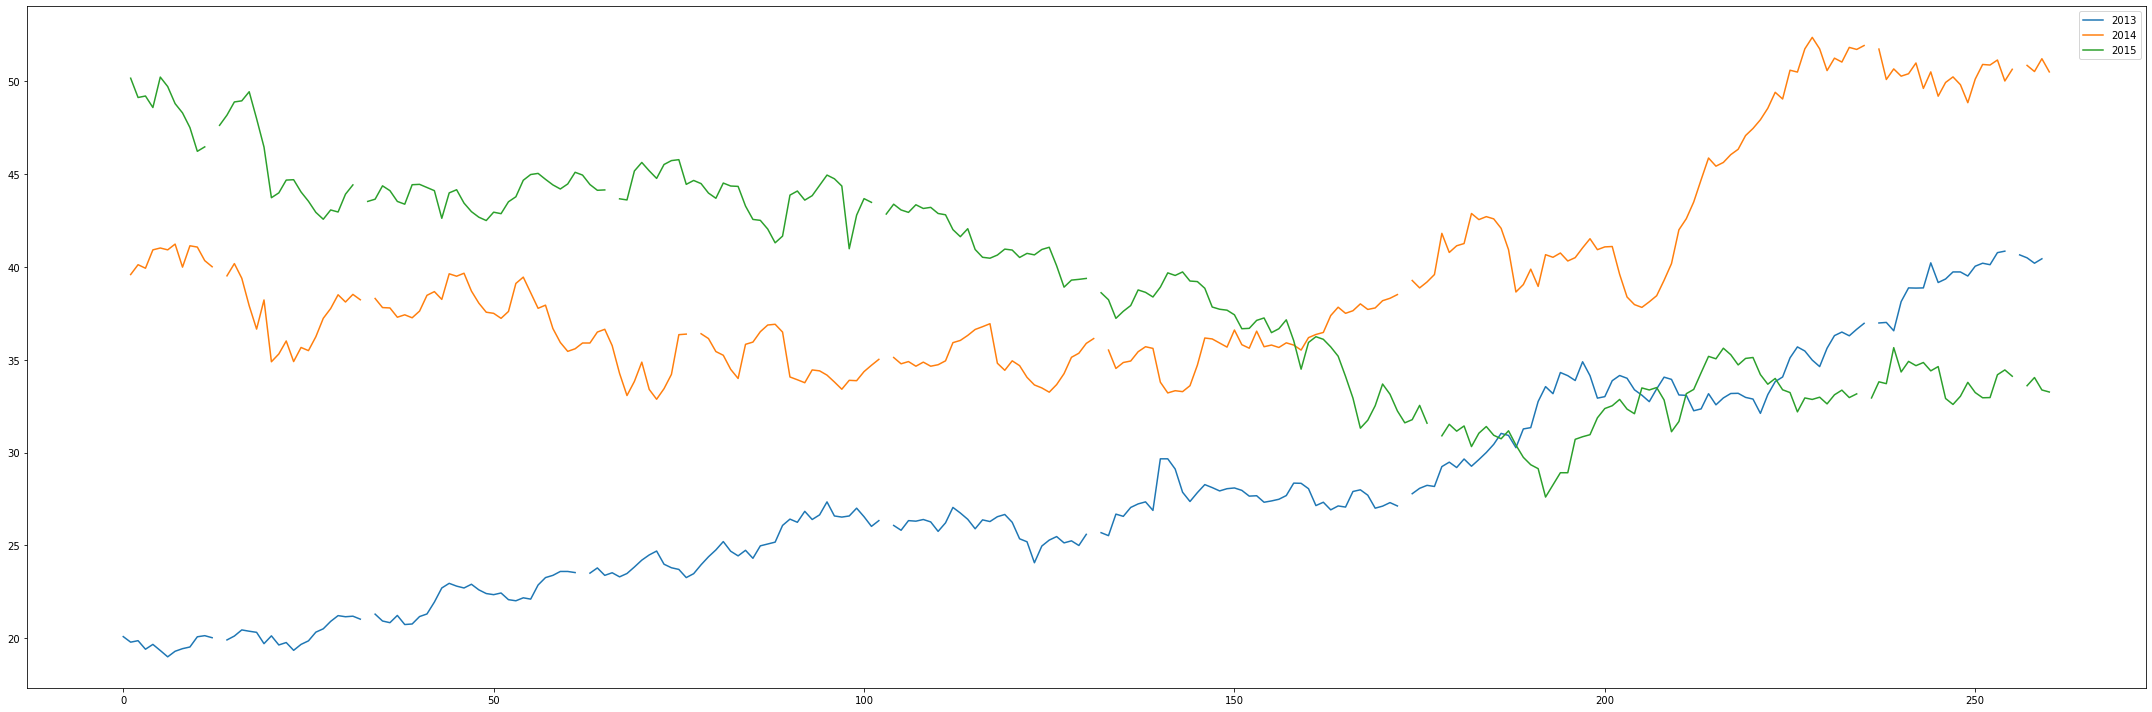

In [62]:
#Select data for each year and concatenate with prices here 
yahoo = pd.read_csv('stock_data/yahoo.csv')
yahoo.date = pd.to_datetime(yahoo.date) # don't forget this step it cost me one hour to debug when not used this
yahoo.set_index('date',inplace=True)
prices = pd.DataFrame()
for year in ['2013','2014','2015']:
    price_per_year = yahoo.loc[year,['price']].reset_index(drop = True)
    price_per_year.rename(columns = {'price':year},inplace = True)
    prices = pd.concat([prices,price_per_year],axis = 1)

# Plot prices
prices.plot()
plt.tight_layout()
plt.show()

## Question: Load the co_cities.csv file in a variable co.

    Inspect co using .info().
    Use .asfreq() to set the frequency to calendar daily.
    Show a plot of 'co' using subplots=True.
    Change the the frequency to monthly using the alias 'M'.
    Show another plot of co using subplots=True.


,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-02,NaN,NaN,NaN
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
...,...,...,...
2010-12-27,0.510417,0.669384,0.414583
2010-12-28,0.479166,0.669129,0.425278
2010-12-29,0.460417,0.291757,0.400924


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 123.9 KB


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

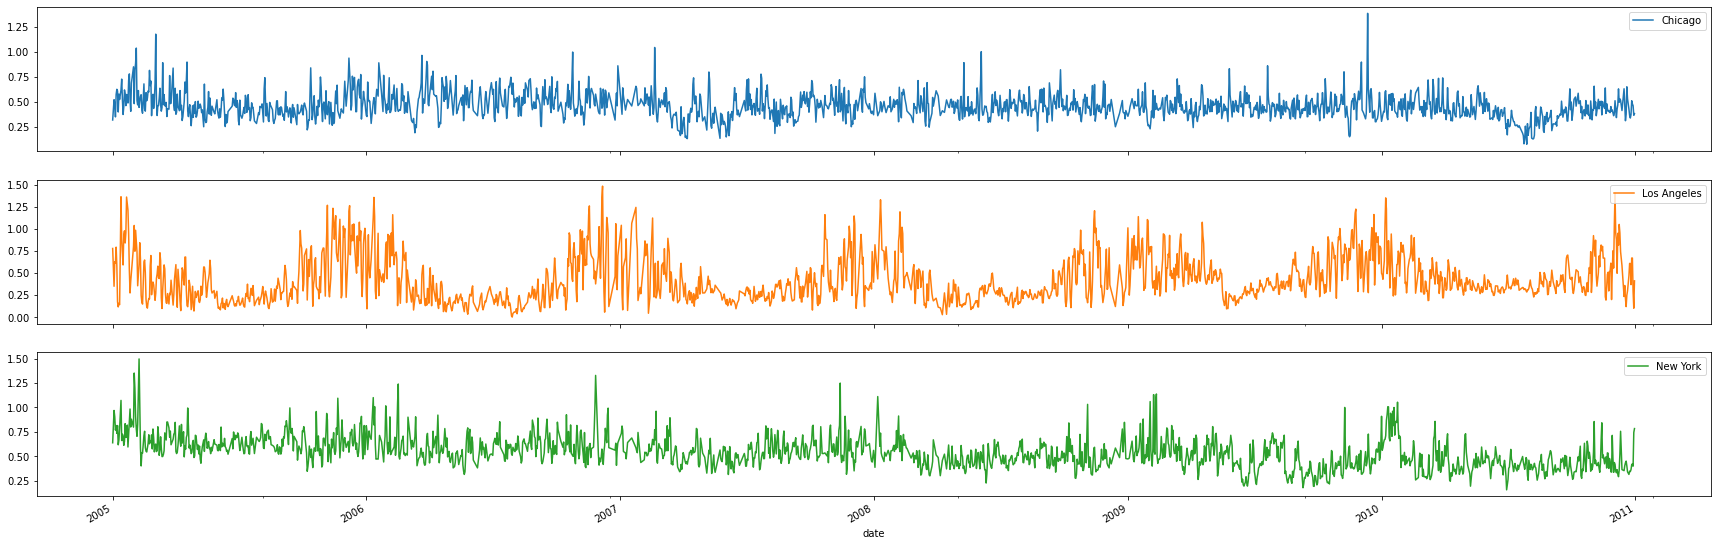

In [72]:
co = pd.read_csv('air_quality_data/co_cities.csv')
co.date = pd.to_datetime(co.date)
co.set_index('date',inplace = True)
co.asfreq('D')
co.info()
co.plot(subplots = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2005-01-01 to 2010-12-31
Freq: D
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 68.5 KB


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

<Figure size 2160x720 with 0 Axes>

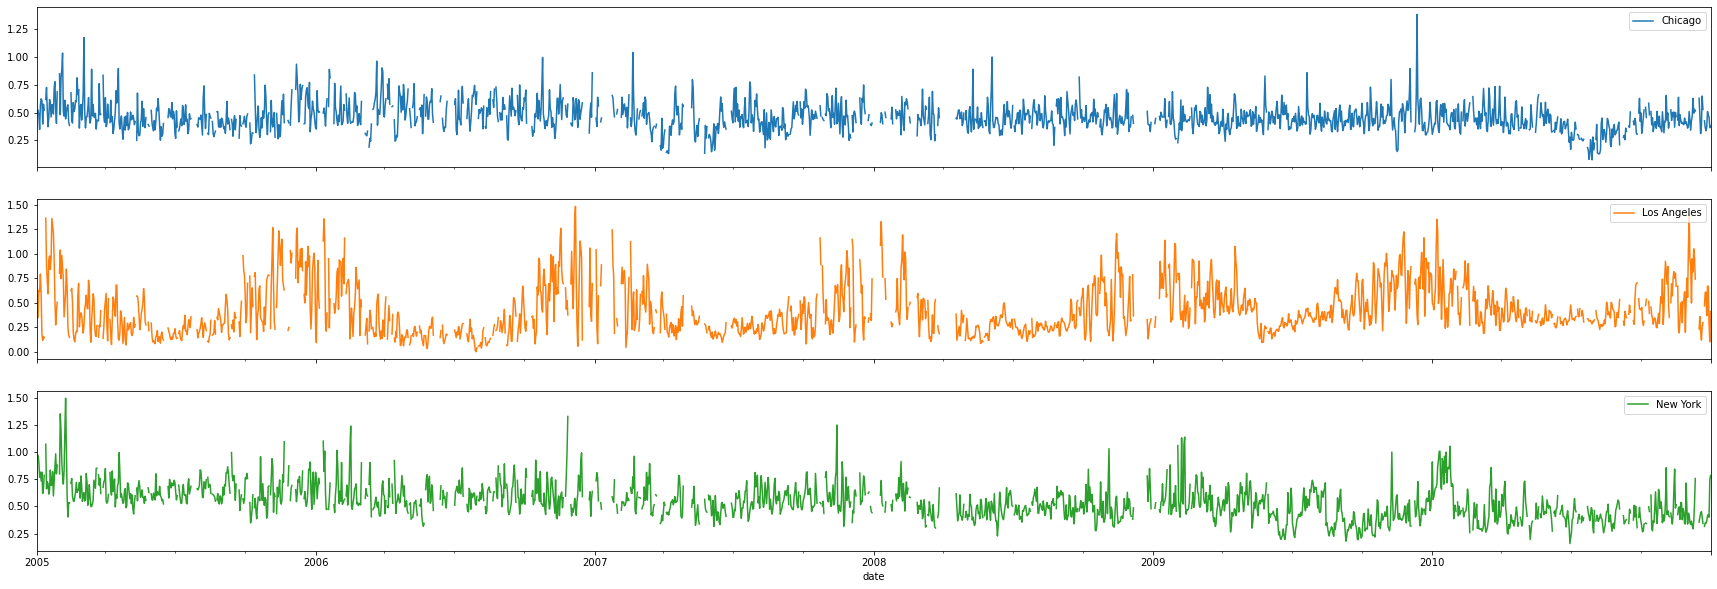

In [125]:
plt.clf()
co = co.asfreq('D')
co.info()
co.plot(subplots = True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2005-01-31 to 2010-12-31
Freq: M
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      68 non-null     float64
 1   Los Angeles  68 non-null     float64
 2   New York     68 non-null     float64
dtypes: float64(3)
memory usage: 2.2 KB


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

<Figure size 2160x720 with 0 Axes>

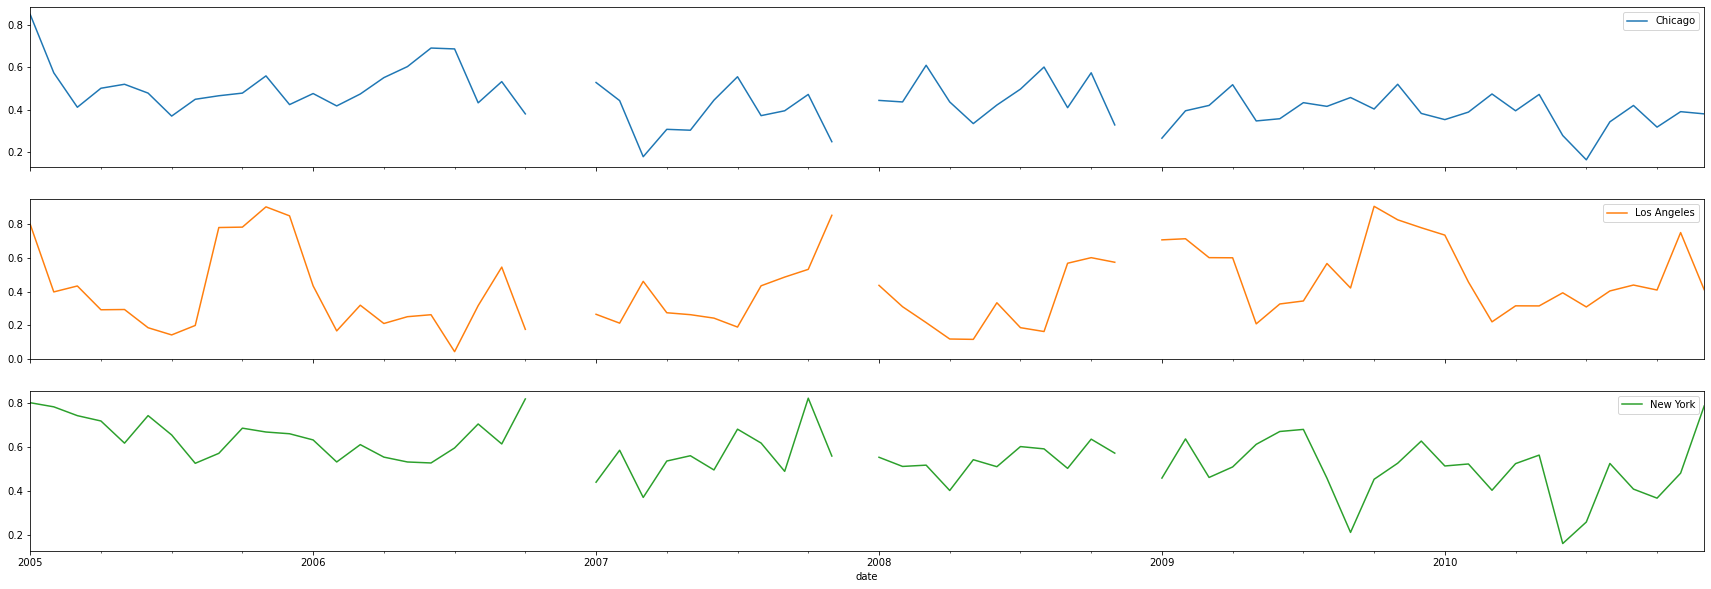

In [127]:
plt.clf()
co = co.asfreq('M')
co.info()
co.plot(subplots = True)

# Lags, Changes, and return for stock price series

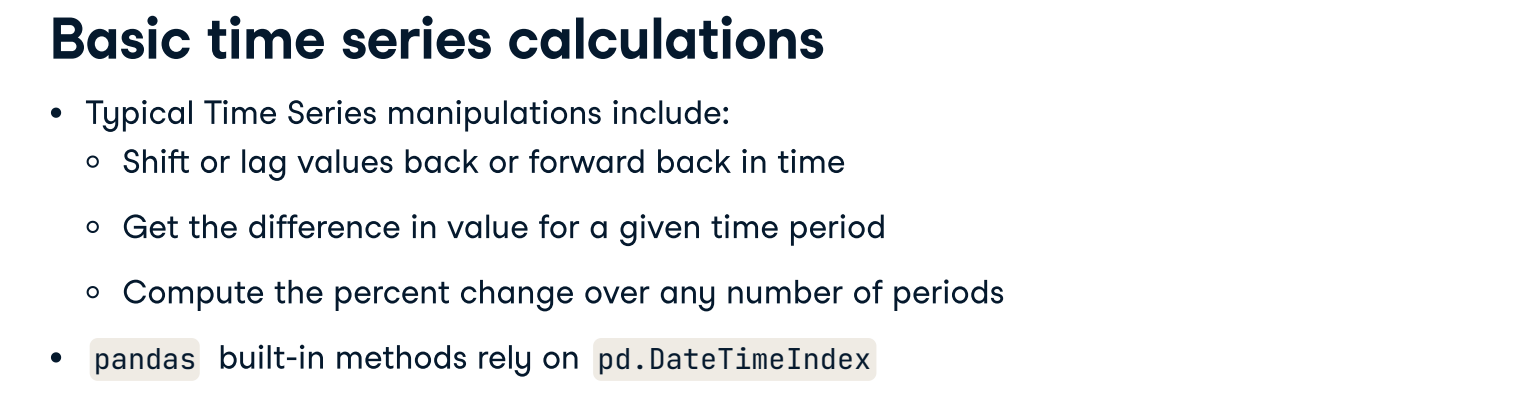

## Getting GOOG stock price 
## pd.read_csv(parse_date = 'Date', index_col = 'Date')

In [84]:
google = pd.read_csv('stock_data/google.csv',parse_dates = ['Date'], index_col = 'Date')

In [86]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1094 entries, 2014-01-02 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   756 non-null    float64
dtypes: float64(1)
memory usage: 17.1 KB


In [87]:
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


## .shift(): Moving data between past & future

In [89]:
google['shifted'] = google.Close.shift() # default: periods=1
google.head(3)

,Close,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95


In [93]:
google['lagged'] = google.Close.shift(periods=-1)
google[['Close','lagged','shifted']].tail(3)

,Close,lagged,shifted
Date,,,
2016-12-28,785.05,782.79,791.55
2016-12-29,782.79,771.82,785.05
2016-12-30,771.82,NaN,782.79


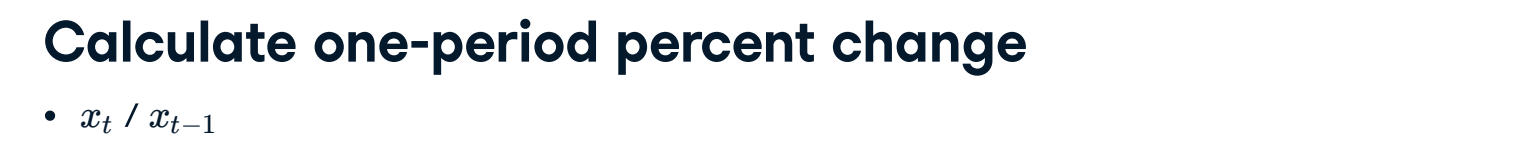

In [94]:
google['change'] = google.Close.div(google.shifted)
google[['Close','shifted','change']].head(3)

,Close,shifted,change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,556.00,0.992716
2014-01-04,NaN,551.95,NaN


## Calculate one-period percent change

In [96]:
google['return'] = google.change.sub(1).mul(100)
google[['Close','shifted','change','return']].head(3)


,Close,shifted,change,return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,556.00,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN


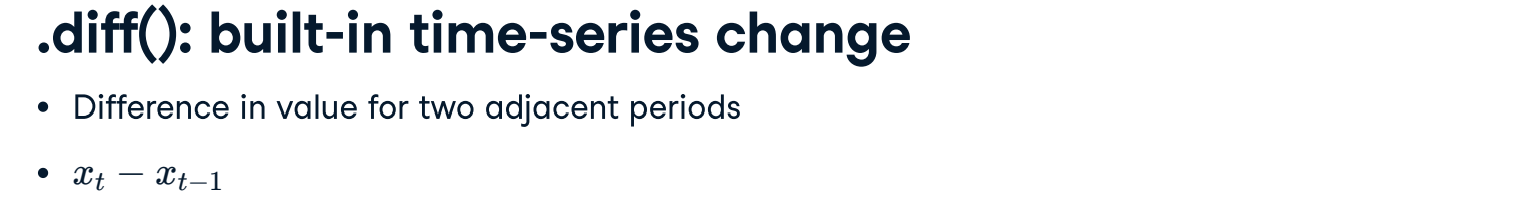

In [99]:
google['diff'] = google.Close.diff()
google[['Close','diff']].head(3)

,Close,diff
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-4.05
2014-01-04,NaN,NaN


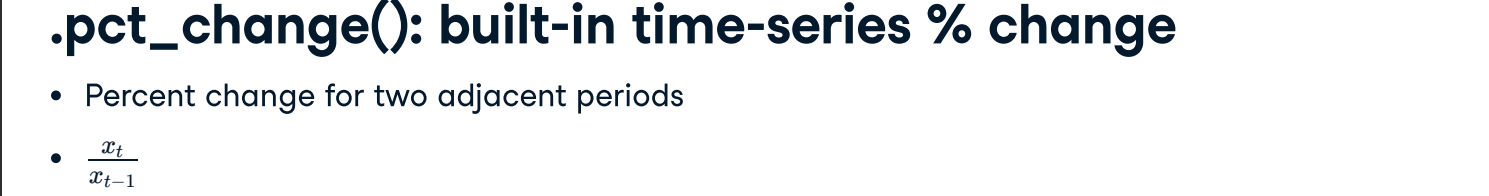

In [100]:
google['pct_change'] = google.Close.pct_change().mul(100)
google[['Close','return','pct_change']].head(3)

,Close,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,-0.728417,-0.728417
2014-01-04,NaN,NaN,0.000000


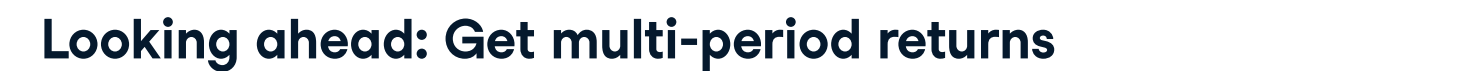

In [109]:
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google[['Close','return_3d']]

,Close,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,-0.728417
2014-01-06,558.10,1.114231
...,...,...
2016-12-26,NaN,0.000000
2016-12-27,791.55,0.207619
2016-12-28,785.05,-0.615260


## Question: We have already imported pandas as pd and matplotlib.pyplot as plt.

    Use pd.read_csv() to import 'google.csv', parsing the 'Date' as dates, setting the result as index and assigning to google.
    Use .asfreq() to set the frequency of google to business daily.
    Add new columns lagged and shifted to google that contain the Close shifted by 90 business days into past and future, respectively.
    Plot the three columns of google.


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

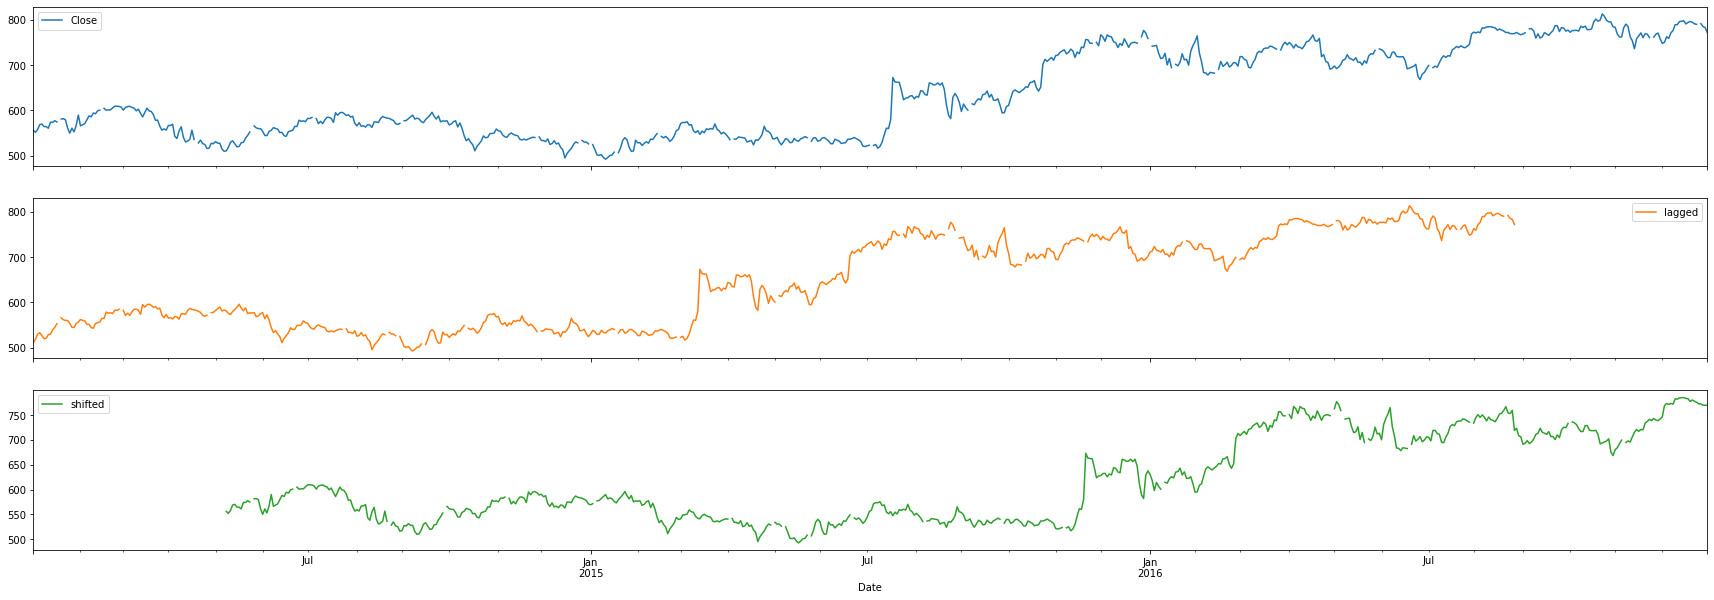

In [114]:
google = google.asfreq('B')
google['lagged'] = google['Close'].shift(periods = -90)
google['shifted'] = google['Close'].shift(periods = 90)
google[['Close','lagged','shifted']].plot(subplots = True)
plt.show()

##  From Yahoo stock prices for the years 2013 to 2015, set the frequency to business daily, and assigned the result to yahoo.

    Create a new column called shifted_30 that contains the 'price' shifted by 30 business days into the future.
    Subtract 'shifted_30' from 'price', and assign the result to a new column, 'change_30'.
    Apply .diff(), setting periods to 30, and assign the result to a new column, 'diff_30'.
    Inspect the last five rows of yahoo to verify the calculation.
    Subtract diff_30 from change_30 using the .sub() method and print the .value_counts() of the result to show both columns are equal.


In [118]:
yahoo.asfreq('B')

# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods = 30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price - yahoo.shifted_30

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail(5))

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

,price,shifted_30,change_30,diff_30
date,,,,
2013-01-02,20.08,NaN,NaN,NaN
2013-01-03,19.78,NaN,NaN,NaN
2013-01-04,19.86,NaN,NaN,NaN
2013-01-07,19.40,NaN,NaN,NaN
2013-01-08,19.66,NaN,NaN,NaN
...,...,...,...,...
2015-12-25,NaN,32.19,NaN,NaN
2015-12-28,33.60,32.94,0.66,0.66
2015-12-29,34.04,32.86,1.18,1.18


            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


## Question:  We have also loaded 'GOOG' stock prices for the years 2014-2016, set the frequency to calendar daily, and assigned the result to google.

    Create the columns 'daily_return', 'monthly_return', and 'annual_return' that contain the pct_change() of 'Close' for 1, 30 and 360 calendar days, respectively, and multiply each by 100.
    Plot the result using subplots=True.


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

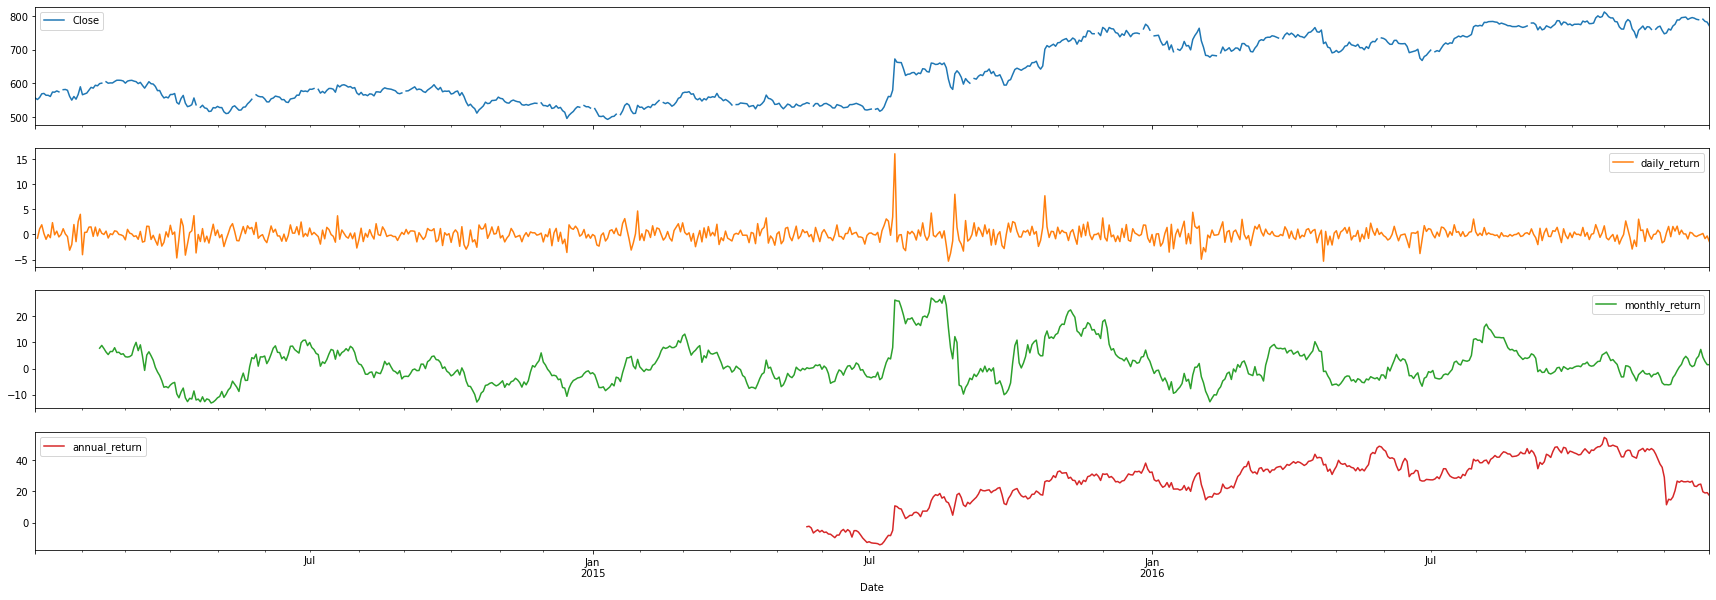

In [120]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods = 1).mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods = 30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods = 360).mul(100)

# Plot the result
google[['Close','daily_return','monthly_return','annual_return']].plot(subplots = True)
plt.show()
